# Project: Oil Spill Classification

In [2]:
PATH = "data/"
FILE_NAME = "oil_spill.csv"

In [4]:

# load and summarize the dataset
from pandas import read_csv
from collections import Counter
# define the dataset location
filename = PATH + FILE_NAME
# load the csv file as a data frame 
dataframe = read_csv(filename, header=None) 
# summarize the shape of the dataset
print(dataframe.shape)
# summarize the class distribution
target = dataframe.values[:,-1]
counter = Counter(target)
for k,v in counter.items():
  per = v / len(target) * 100
  print('Class=%d, Count=%d, Percentage=%.3f%%' % (k, v, per))

(937, 50)
Class=1, Count=41, Percentage=4.376%
Class=0, Count=896, Percentage=95.624%


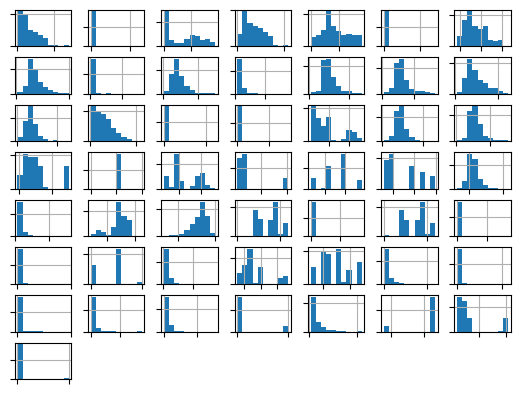

In [5]:
# create histograms of each variable
from pandas import read_csv
from matplotlib import pyplot
# define the dataset location
filename = PATH + FILE_NAME
# load the csv file as a data frame 
dataframe = read_csv(filename, header=None) 
# create a histogram plot of each variable 
ax = dataframe.hist()
# disable axis labels
for axis in ax.flatten():
  axis.set_title('') 
  axis.set_xticklabels([]) 
  axis.set_yticklabels([])
pyplot.show()


## Model Test and Baseline Result

In [6]:
# test harness and baseline model evaluation
from collections import Counter
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyClassifier
# load the dataset
def load_dataset(full_path):
  # load the dataset as a numpy array
  data = read_csv(full_path, header=None)
  # drop unused columns
  data.drop(22, axis=1, inplace=True)
  data.drop(0, axis=1, inplace=True)
  # retrieve numpy array
  data = data.values
  # split into input and output elements
  X, y = data[:, :-1], data[:, -1]
  # label encode the target variable to have the classes 0 and 1
  y = LabelEncoder().fit_transform(y)
  return X, y
# evaluate a model
def evaluate_model(X, y, model):
  # define evaluation procedure
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  # define the model evaluation the metric
  metric = make_scorer(geometric_mean_score)
  # evaluate model
  scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
  return scores

# define the location of the dataset
full_path = PATH + FILE_NAME
# load the dataset
X, y = load_dataset(full_path)
# summarize the loaded dataset
print(X.shape, y.shape, Counter(y))
# define the reference model
model = DummyClassifier(strategy='uniform')
# evaluate the model
scores = evaluate_model(X, y, model)
# summarize performance
print('Mean G-Mean: %.3f (%.3f)' % (mean(scores), std(scores)))

(937, 47) (937,) Counter({0: 896, 1: 41})
Mean G-Mean: 0.479 (0.129)


## Evaluate Models

>LR 0.672 (0.203)
>LDA 0.755 (0.147)
>NB 0.707 (0.202)


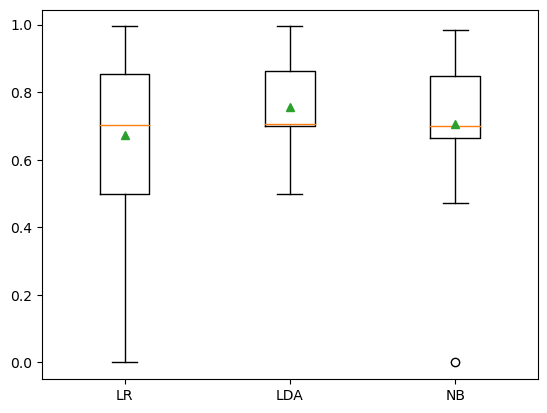

In [7]:

# compare probabilistic model on the oil spill dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from imblearn.metrics import geometric_mean_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
# load the dataset
def load_dataset(full_path):
  # load the dataset as a numpy array
  data = read_csv(full_path, header=None)
  # drop unused columns
  data.drop(22, axis=1, inplace=True)
  data.drop(0, axis=1, inplace=True)
  # retrieve numpy array
  data = data.values
  # split into input and output elements
  X, y = data[:, :-1], data[:, -1]
  # label encode the target variable to have the classes 0 and 1
  y = LabelEncoder().fit_transform(y)
  return X, y
# evaluate a model
def evaluate_model(X, y, model):
  # define evaluation procedure
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  # define the model evaluation the metric
  metric = make_scorer(geometric_mean_score)
  # evaluate model
  scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
  return scores

# define models to test
def get_models():
  models, names = list(), list()
  # LR
  steps = [('t',StandardScaler()),('m',LogisticRegression(solver='liblinear'))] 
  models.append(Pipeline(steps=steps))
  names.append('LR')
  # LDA
  steps = [('t', StandardScaler()),('m',LinearDiscriminantAnalysis())] 
  models.append(Pipeline(steps=steps))
  names.append('LDA')
  # NB
  models.append(GaussianNB())
  names.append('NB')
  return models, names
# define the location of the dataset
full_path = PATH + FILE_NAME
# load the dataset
X, y = load_dataset(full_path) # define models
models, names = get_models()
# evaluate each model
results = list()
for i in range(len(models)):
    # evaluate the model and store results
  scores = evaluate_model(X, y, models[i])
  results.append(scores)
  # summarize and store
  print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores)))
# plot the results
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()


## Evaluate Balanced Logistic Regression

/Users/test/miniforge3/envs/machine-learning-env/lib/python3.8/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/test/miniforge3/envs/machine-learning-env/lib/python3.8/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/test/miniforge3/envs/machine-learning-env/lib/python3.8/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/test/miniforge3/envs/machine-learning-env/lib/python3.8/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/test/miniforge3/envs/machine-learning-env/lib/python3.8/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of

>Balanced 0.845 (0.124)
>Balanced-Norm 0.836 (0.088)
>Balanced-Std 0.834 (0.129)
>Balanced-Power 0.862 (0.124)


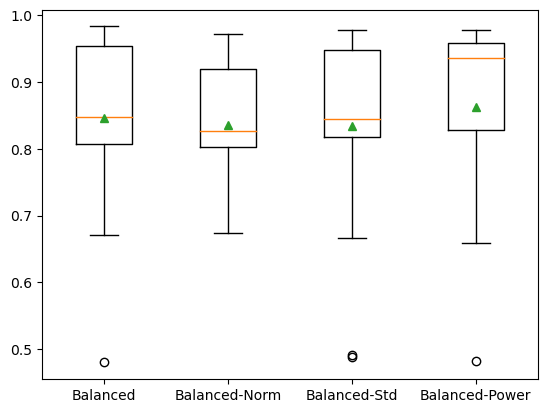

In [8]:
# compare balanced logistic regression on the oil spill dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import make_scorer
from sklearn.linear_model import LogisticRegression
from imblearn.metrics import geometric_mean_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer

def load_dataset(full_path):
  # load the dataset as a numpy array
  data = read_csv(full_path, header=None)
  # drop unused columns
  data.drop(22, axis=1, inplace=True)
  data.drop(0, axis=1, inplace=True)
  # retrieve numpy array
  data = data.values
  # split into input and output elements
  X, y = data[:, :-1], data[:, -1]
  # label encode the target variable to have the classes 0 and 1
  y = LabelEncoder().fit_transform(y)
  return X, y

# evaluate a model
def evaluate_model(X, y, model):
  # define evaluation procedure
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  # define the model evaluation the metric
  metric = make_scorer(geometric_mean_score)
  # evaluate model
  scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
  return scores

# define models to test
def get_models():
  models, names = list(), list()
  # LR Balanced
  models.append(LogisticRegression(solver='liblinear', class_weight='balanced')) 
  names.append('Balanced')
  # LR Balanced + Normalization
  steps = [('t',MinMaxScaler()), ('m', LogisticRegression(solver='liblinear',
  class_weight='balanced'))]
  models.append(Pipeline(steps=steps))
  names.append('Balanced-Norm')
  # LR Balanced + Standardization
  steps = [('t',StandardScaler()), ('m', LogisticRegression(solver='liblinear',
  class_weight='balanced'))] 
  models.append(Pipeline(steps=steps)) 
  names.append('Balanced-Std')
  # LR Balanced + Power
  steps = [('t1',MinMaxScaler()), ('t2',PowerTransformer()), ('m', LogisticRegression(solver='liblinear', class_weight='balanced'))]
  models.append(Pipeline(steps=steps)) 
  names.append('Balanced-Power') 
  return models, names

# define the location of the dataset
full_path =  PATH + FILE_NAME
# load the dataset
X, y = load_dataset(full_path) # define models
models, names = get_models()
# evaluate each model
results = list()

for i in range(len(models)):
  # evaluate the model and store results
  scores = evaluate_model(X, y, models[i])
  results.append(scores)
  # summarize and store
  print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores)))
# plot the results
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()